<a href="https://colab.research.google.com/github/Prava0712/News-Article/blob/main/News_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Collection and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
# Load dataset
df = pd.read_csv("data_news.csv")
# Display first 5 rows
df.head()


,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


1.Collect a dataset of labeled news articles (sports, politics, technology etc). 2.Clean and
preprocess the text data. Handle missing data, if any, and ensure the text is ready for feature extraction

In [2]:
# Display dataset info
df.info()
# Check total rows and unique categories
print("Total Rows:", len(df))
print("Unique Categories:", df['category'].nunique())
print("Category Distribution:\n", df['category'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24910 entries, 0 to 24909
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           24910 non-null  object
 1   headline           24910 non-null  object
 2   links              24910 non-null  object
 3   short_description  24909 non-null  object
 4   keywords           23795 non-null  object
dtypes: object(5)
memory usage: 973.2+ KB
Total Rows: 24910
Unique Categories: 5
Category Distribution:
 category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    4910
Name: count, dtype: int64


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())
# Drop missing values if any
df = df.dropna()
# Remove duplicate entries
df = df.drop_duplicates()
# Confirm changes
print("Dataset shape after cleaning:", df.shape)

Missing values:
 category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64
Dataset shape after cleaning: (23795, 5)


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    if isinstance(text, str): # Ensure the input is a string
        # Lowercase
        text = text.lower()
        # Remove punctuation, numbers, and special characters
        text = re.sub(r'[^a-z\s]', '', text)
        # Tokenize
        tokens = text.split()
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join back into string
        return " ".join(tokens)
    else:
        return "" # Return empty string or handle non-string as appropriate

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
# Apply preprocessing to headline and short_description columns
df['cleaned_headline'] = df['headline'].apply(preprocess_text)
df['cleaned_short_description'] = df['short_description'].apply(preprocess_text)

# Example of cleaned text
for i in range(3):
 print(f"Original Headline: {df['headline'].iloc[i][:100]}...")
 print(f"Cleaned Headline: {df['cleaned_headline'].iloc[i][:100]}...")
 print(f"Original Short Description: {df['short_description'].iloc[i][:100]}...")
 print(f"Cleaned Short Description: {df['cleaned_short_description'].iloc[i][:100]}...")
 print('-'*80)

Original Headline: 143 Miles in 35 Days: Lessons Learned...
Cleaned Headline: mile day lesson learned...
Original Short Description: Resting is part of training. I've confirmed what I sort of already knew: I'm not built for running s...
Cleaned Short Description: resting part training ive confirmed sort already knew im built running streak im built hard workout ...
--------------------------------------------------------------------------------
Original Headline: Talking to Yourself: Crazy or Crazy Helpful?...
Cleaned Headline: talking crazy crazy helpful...
Original Short Description: Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own...
Cleaned Short Description: think talking tool coach challenge narrate experience case treat respect may find enjoy company...
--------------------------------------------------------------------------------
Original Headline: Crenezumab: Trial Will Gauge Whether Alzheimer's Drug Can Prevent Or Slow The

In [11]:
# Save preprocessed dataset for feature extraction
df.to_csv("cleaned_data_news.csv", index=False)
print("✅ Preprocessed data saved successfully!")

✅ Preprocessed data saved successfully!


Feature Extraction ● Use methods like TF-IDF, word embeddings (e.g., Word2Vec,
GloVe), or bag-of-words to convert text data into numerical features. ● Perform
exploratory data analysis (EDA) to understand the distribution of different categories.

/tmp/ipython-input-2995275657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


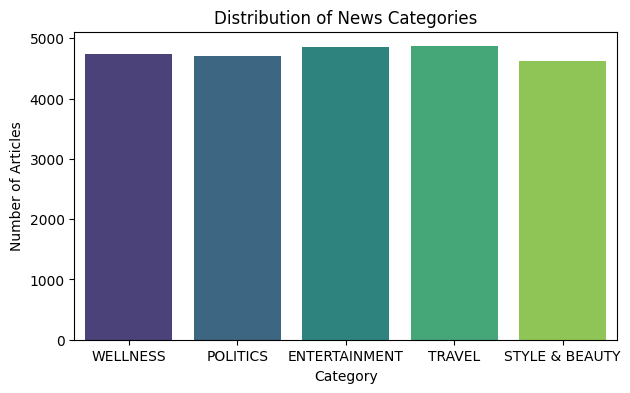

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot category distribution
plt.figure(figsize=(7,4))
sns.countplot(x='category', data=df, palette='viridis')
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()


Bag of Words (BoW) Representation

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine cleaned headline and short description
df['combined_cleaned_text'] = df['cleaned_headline'] + ' ' + df['cleaned_short_description']
# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer(max_features=2000) # top 2000 frequent words
X_bow = bow_vectorizer.fit_transform(df['combined_cleaned_text'])
print("BoW Shape:", X_bow.shape)

BoW Shape: (23795, 2000)


TF-IDF Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
# Transform text data into TF-IDF features
X_tfidf = tfidf.fit_transform(df['combined_cleaned_text'])
y = df['category']
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (23795, 3000)


Sample TF-IDF Features

In [16]:
# Convert a few rows to DataFrame for visualization
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray()[:5], columns=feature_names)
tfidf_df.iloc[:, :10].head() # Display first 10 features


,abandoned,abc,ability,able,abortion,abroad,absolutely,abuse,academy,academy award
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Word2Vec Embeddings

In [18]:
# Install gensim
!pip install gensim
from gensim.models import Word2Vec
import nltk
# Tokenize for Word2Vec
tokenized_docs = [text.split() for text in
df['combined_cleaned_text']]
# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=100,
window=5, min_count=2, workers=4)
# Example: Similar words to 'cricket'
# Check if 'cricket' is in the vocabulary before finding similar words
if 'cricket' in w2v_model.wv.key_to_index:
 print(w2v_model.wv.most_similar('cricket'))
else:
 print("'cricket' is not in the vocabulary.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.0 MB/s eta 0:00:00
[('ebola', 0.9752533435821533), ('volcano', 0.9741717576980591), ('bronze', 0.9741410613059998), ('casino', 0.9741151332855225), ('daphne', 0.973657488822937), ('costume', 0.9736200571060181), ('slide', 0.9736104011535645), ('crossing', 0.9736099243164062), ('chastain', 0.9735456705093384), ('stewart', 0.973482072353363)]


In [21]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Load dataset
# Assuming 'data_news.csv' is accessible in the environment
try:
    df = pd.read_csv("data_news.csv")
except FileNotFoundError:
    print("Error: data_news.csv not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file is essential
    # For this example, we will stop further processing if the file is not found.
    raise
# Drop missing values and duplicates (assuming these steps were successful previously)
df = df.dropna()
df = df.drop_duplicates()
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    if isinstance(text, str): # Ensure the input is a string
        # Lowercase
        text = text.lower()
        # Remove punctuation, numbers, and special characters
        text = re.sub(r'[^a-z\s]', '', text)
        # Tokenize
        tokens = text.split()
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join back into string
        return " ".join(tokens)
    else:
        return "" # Return empty string or handle non-string as appropriate
# Apply preprocessing to 'headline' and 'short_description' columns
df['cleaned_headline'] = df['headline'].apply(preprocess_text)
df['cleaned_short_description'] = \
df['short_description'].apply(preprocess_text)
# Combine cleaned headline and short description
df['combined_cleaned_text'] = df['cleaned_headline'] + ' ' + \
df['cleaned_short_description']
print("DataFrame and combined text column recreated.")
display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


DataFrame and combined text column recreated.


,category,headline,links,short_description,keywords,cleaned_headline,cleaned_short_description,combined_cleaned_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,mile day lesson learned,resting part training ive confirmed sort alrea...,mile day lesson learned resting part training ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,talking crazy crazy helpful,think talking tool coach challenge narrate exp...,talking crazy crazy helpful think talking tool...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,crenezumab trial gauge whether alzheimers drug...,clock ticking united state find cure team work...,crenezumab trial gauge whether alzheimers drug...
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,oh difference made,want busy keep trying perfect want happy focus...,oh difference made want busy keep trying perfe...
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,green superfoods,first bad news soda bread corned beef beer hig...,green superfoods first bad news soda bread cor...


Textual Feature Engineering (Optional Extra Credit)

In [22]:
# Textual features
df['word_count'] = df['combined_cleaned_text'].apply(lambda x:
len(x.split()))
df['char_count'] = df['combined_cleaned_text'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']
# Display a few examples
display(df[['category', 'word_count', 'char_count',
'avg_word_length']].head())

,category,word_count,char_count,avg_word_length
0,WELLNESS,36,223,6.194444
1,WELLNESS,18,123,6.833333
2,WELLNESS,21,143,6.809524
3,WELLNESS,13,83,6.384615
4,WELLNESS,17,104,6.117647


Save Processed Features

In [24]:
# Save TF-IDF features and labels for model training
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
# Re-initialize and fit TF-IDF Vectorizer to ensure it's defined
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
# Assuming 'combined_cleaned_text' and 'category' columns exist from
# previous steps
# Transform text data into TF-IDF features
X_tfidf = tfidf.fit_transform(df['combined_cleaned_text'])
y = df['category']
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(X_tfidf, "X_tfidf.pkl")
joblib.dump(y, "y_labels.pkl")
print("✅ Features saved successfully for model training!")

✅ Features saved successfully for model training!


Model Development and Training. ● Build classification models using algorithms like
Logistic Regression, Naive Bayes, Support Vector Machines (SVM). ● Train the models on
the preprocessed text data, tuning hyperparameters as necessary. ● Use cross-validation
to ensure robust evaluation of model performance

In [25]:
from sklearn.model_selection import train_test_split
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
test_size=0.2, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 34696
Testing samples: 8674


Train Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Train model
log_reg.fit(X_train, y_train)
# Cross-validation (5 folds)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5,
scoring='accuracy')
print("Logistic Regression CV Accuracy:", np.mean(cv_scores).round(3))
# Test accuracy
log_reg_acc = log_reg.score(X_test, y_test)
print("Logistic Regression Test Accuracy:", round(log_reg_acc, 3))

Logistic Regression CV Accuracy: 0.768
Logistic Regression Test Accuracy: 0.765


Train Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
# Cross-validation
nb_cv = cross_val_score(nb, X_train, y_train, cv=5,
scoring='accuracy')
print("Naive Bayes CV Accuracy:", np.mean(nb_cv).round(3))
# Test accuracy
nb_acc = nb.score(X_test, y_test)
print("Naive Bayes Test Accuracy:", round(nb_acc, 3))

Naive Bayes CV Accuracy: 0.75
Naive Bayes Test Accuracy: 0.749


Train Support Vector Machine (SVM)

In [28]:
from sklearn.svm import LinearSVC
# Initialize and train SVM
svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)
# Cross-validation
svm_cv = cross_val_score(svm, X_train, y_train, cv=5,
scoring='accuracy')
print("SVM CV Accuracy:", np.mean(svm_cv).round(3))
# Test accuracy
svm_acc = svm.score(X_test, y_test)
print("SVM Test Accuracy:", round(svm_acc, 3))

SVM CV Accuracy: 0.753
SVM Test Accuracy: 0.759


Compare Model Performance

In [29]:
# Model performance summary
results = pd.DataFrame({
 'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
 'CV Accuracy': [np.mean(cv_scores), np.mean(nb_cv),
np.mean(svm_cv)],
 'Test Accuracy': [log_reg_acc, nb_acc, svm_acc]
})
results = results.round(3)
results


,Model,CV Accuracy,Test Accuracy
0,Logistic Regression,0.768,0.765
1,Naive Bayes,0.750,0.749
2,SVM,0.753,0.759


Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
# Example: tuning Logistic Regression
param_grid = {'C': [0.1, 1, 5, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid,
cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 3))


Best Parameters for Logistic Regression: {'C': 1}
Best CV Accuracy: 0.768


Save Trained Models

In [31]:
import joblib
joblib.dump(log_reg, "model_logreg.pkl")
joblib.dump(nb, "model_naive_bayes.pkl")
joblib.dump(svm, "model_svm.pkl")
print("✅ Models saved successfully for evaluation!")

✅ Models saved successfully for evaluation!


Model Evaluation ● Evaluate the models using appropriate metrics. ● Compare the
performance of different models and select the best one for classification.


In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

Evaluate All Models on Test Data

In [34]:
models = {
 "Logistic Regression": log_reg,
 "Naive Bayes": nb,
 "SVM": svm
}
metrics = []
for name, model in models.items():
 y_pred = model.predict(X_test)
 acc = accuracy_score(y_test, y_pred)
 prec = precision_score(y_test, y_pred, average='weighted')
 rec = recall_score(y_test, y_pred, average='weighted')
 f1 = f1_score(y_test, y_pred, average='weighted')
 metrics.append([name, acc, prec, rec, f1])
results_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy',
'Precision', 'Recall', 'F1-Score'])
results_df = results_df.round(3)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.765,0.766,0.765,0.765
1,Naive Bayes,0.749,0.753,0.749,0.747
2,SVM,0.759,0.759,0.759,0.759


Confusion Matrix Visualization (for Best Model)

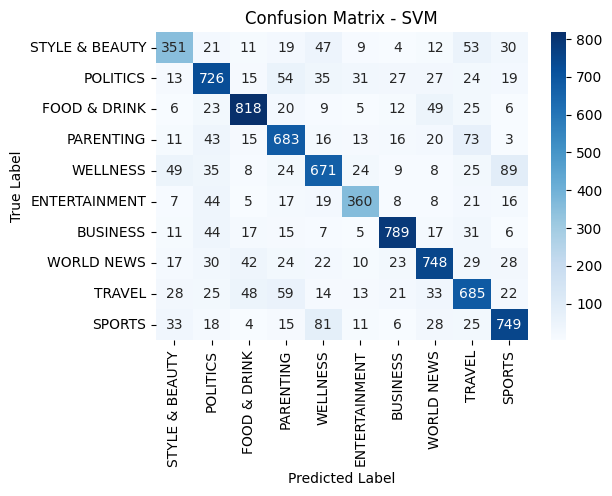

In [35]:
# Predict using best model (SVM)
best_model = svm
y_pred_best = best_model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Classification Report (Detailed View)

In [36]:
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred_best))

Classification Report for SVM:

                precision    recall  f1-score   support

      BUSINESS       0.67      0.63      0.65       557
 ENTERTAINMENT       0.72      0.75      0.73       971
  FOOD & DRINK       0.83      0.84      0.84       973
     PARENTING       0.73      0.76      0.75       893
      POLITICS       0.73      0.71      0.72       942
        SPORTS       0.75      0.71      0.73       505
STYLE & BEAUTY       0.86      0.84      0.85       942
        TRAVEL       0.79      0.77      0.78       973
      WELLNESS       0.69      0.72      0.71       948
    WORLD NEWS       0.77      0.77      0.77       970

      accuracy                           0.76      8674
     macro avg       0.75      0.75      0.75      8674
  weighted avg       0.76      0.76      0.76      8674

